# Matplotlib/ Seaborn Data Visualization Cheatsheet (Hands-on)


## 0. Setup

In [1]:
# Core imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Helpful extras (optional)
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# Reproducibility
RANDOM_STATE = 42
rng = np.random.default_rng(RANDOM_STATE)

# Notebook display defaults
plt.rcParams["figure.figsize"] = (8, 4.5)
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.titlepad"] = 10

# If you're in a notebook, uncomment:
%matplotlib inline

## 1. Sample Data

- Time series sample

In [2]:
dates = pd.date_range("2025-01-01", periods=180, freq="D")
ts = pd.DataFrame({
    "date": dates,
    "y": np.cumsum(rng.normal(loc=0.0, scale=1.0, size=len(dates))) + 100,
})
ts["y_roll7"] = ts["y"].rolling(7).mean()
ts.tail(10)

,date,y,y_roll7
170,2025-06-20,90.215871,90.593588
171,2025-06-21,90.661943,90.594657
172,2025-06-22,90.206960,90.659717
173,2025-06-23,88.981354,90.416610
174,2025-06-24,87.703416,89.935946
175,2025-06-25,87.876004,89.502315
176,2025-06-26,89.455096,89.300092
177,2025-06-27,89.615087,89.214266
178,2025-06-28,89.496449,89.047767
179,2025-06-29,89.782275,88.987097


- Categorical sample


In [3]:
cats = pd.DataFrame({
    "category": rng.choice(list("ABCD"), size=600, replace=True),
    "value": rng.normal(50, 12, size=600),
})
cats["segment"] = rng.choice(["new", "returning"], size=len(cats), p=[0.6, 0.4])
cats.head()

,category,value,segment
0,B,36.591391,new
1,B,44.495897,new
2,A,46.481701,new
3,D,73.246774,returning
4,B,63.271920,returning


- Scatter sample (with a relationship)


In [4]:
x = rng.normal(size=400)
y = 2.5 * x + rng.normal(scale=0.9, size=400)
sc = pd.DataFrame({"x": x, "y": y, "size": rng.integers(20, 200, size=400)})
sc.head()

,x,y,size
0,0.751796,1.337044,176
1,0.128622,-0.662052,41
2,2.386952,4.665075,65
3,-1.100136,-1.200215,37
4,-0.102662,-0.011079,146


## 2. Line Plot

- `Figure`: the whole canvas = a sheet of paper
- `Axes`: one plotting area inside the figure = a single chart panel printed on that paper
- `Plots`: The plots (lines/ bars/ scatters) live inside an Axes = the ink marks inside that chart panel

In [5]:
ts.head()

,date,y,y_roll7
0,2025-01-01,100.304717,NaN
1,2025-01-02,99.264733,NaN
2,2025-01-03,100.015184,NaN
3,2025-01-04,100.955749,NaN
4,2025-01-05,99.004714,NaN


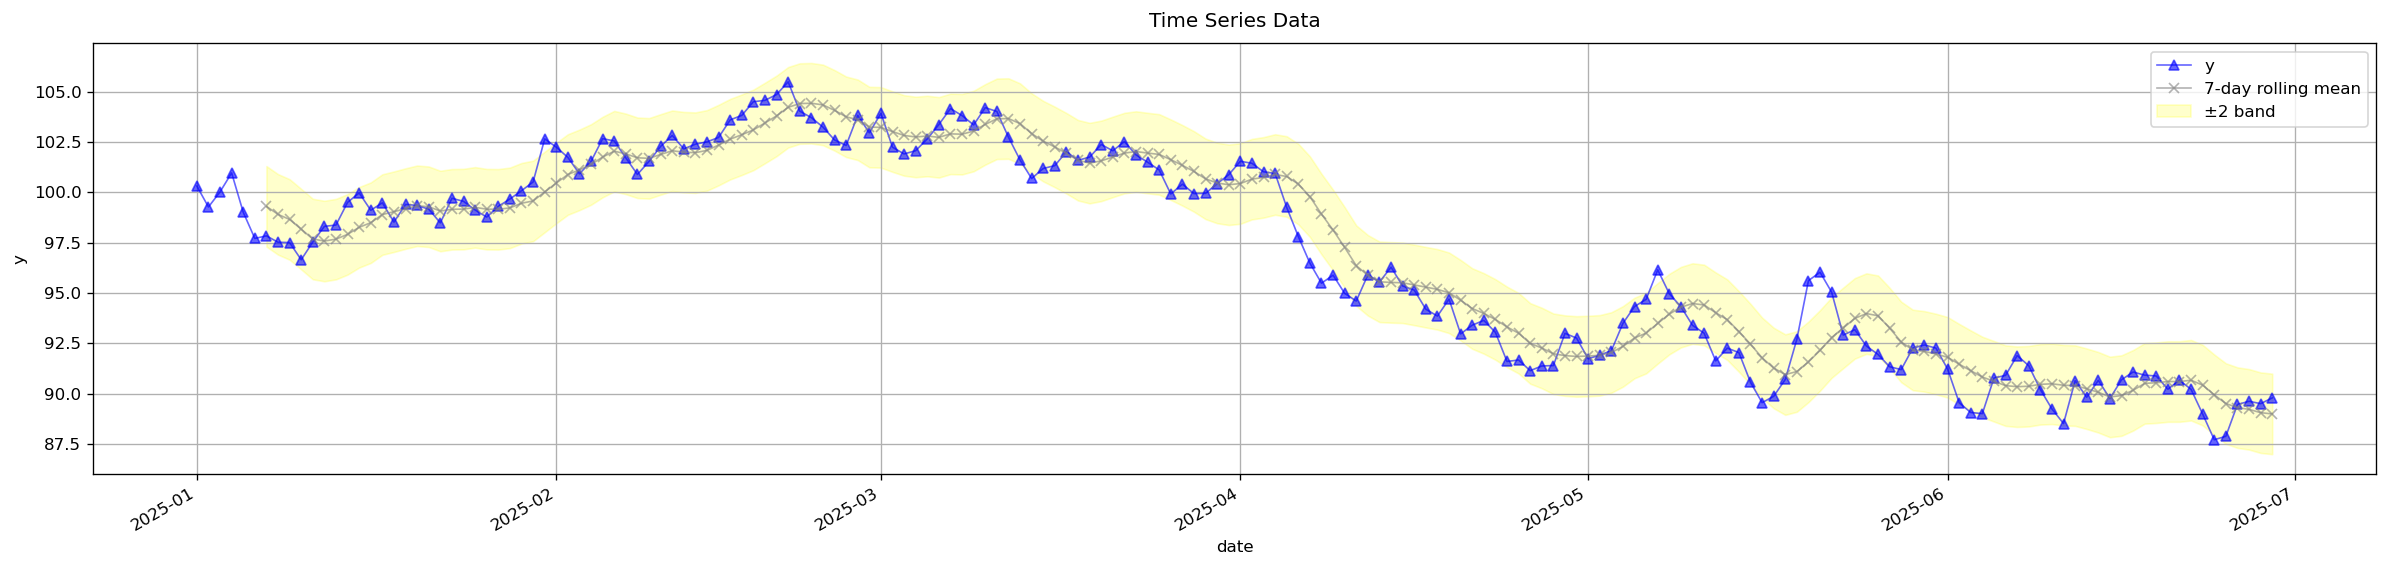

In [6]:
### plt.subplots() creates the containers for you and returns them:
### fig: a Figure object
### ax: an Axes object

### in notebook, dpi=120-150 looks good, dpi means dots per inch, higher dpi -> sharper text/ lines
fig, ax = plt.subplots(1, 1, figsize=(20, 5), dpi=120)

### plot the time series on this Axes
ax.plot(
    ts["date"],
    ts["y"],
    linewidth=1,
    marker="^",
    markersize=6,
    alpha=0.6,
    color='blue',
    label="y",
)

ax.plot(
    ts["date"],
    ts["y_roll7"],
    linewidth=1,
    marker="x",
    markersize=6,
    alpha=0.6,
    color='grey',
    label="7-day rolling mean",
)

### Create a fake band around rolling mean
band = 2.0
low = ts["y_roll7"] - band
high = ts["y_roll7"] + band

### fill_between(): confidence band/ range
ax.fill_between(
    ts["date"], 
    low, 
    high, 
    alpha=0.2, 
    color='yellow', 
    label="±2 band"
)

ax.set_title("Time Series Data")
ax.set_xlabel("date")
ax.set_ylabel("y")

plt.legend()

### make spacing nicer, so that labels/ titles don't get cut off
plt.tight_layout()
fig.autofmt_xdate()

plt.show()


## 3. Scatter Plot

In [7]:
sc.head()

,x,y,size
0,0.751796,1.337044,176
1,0.128622,-0.662052,41
2,2.386952,4.665075,65
3,-1.100136,-1.200215,37
4,-0.102662,-0.011079,146


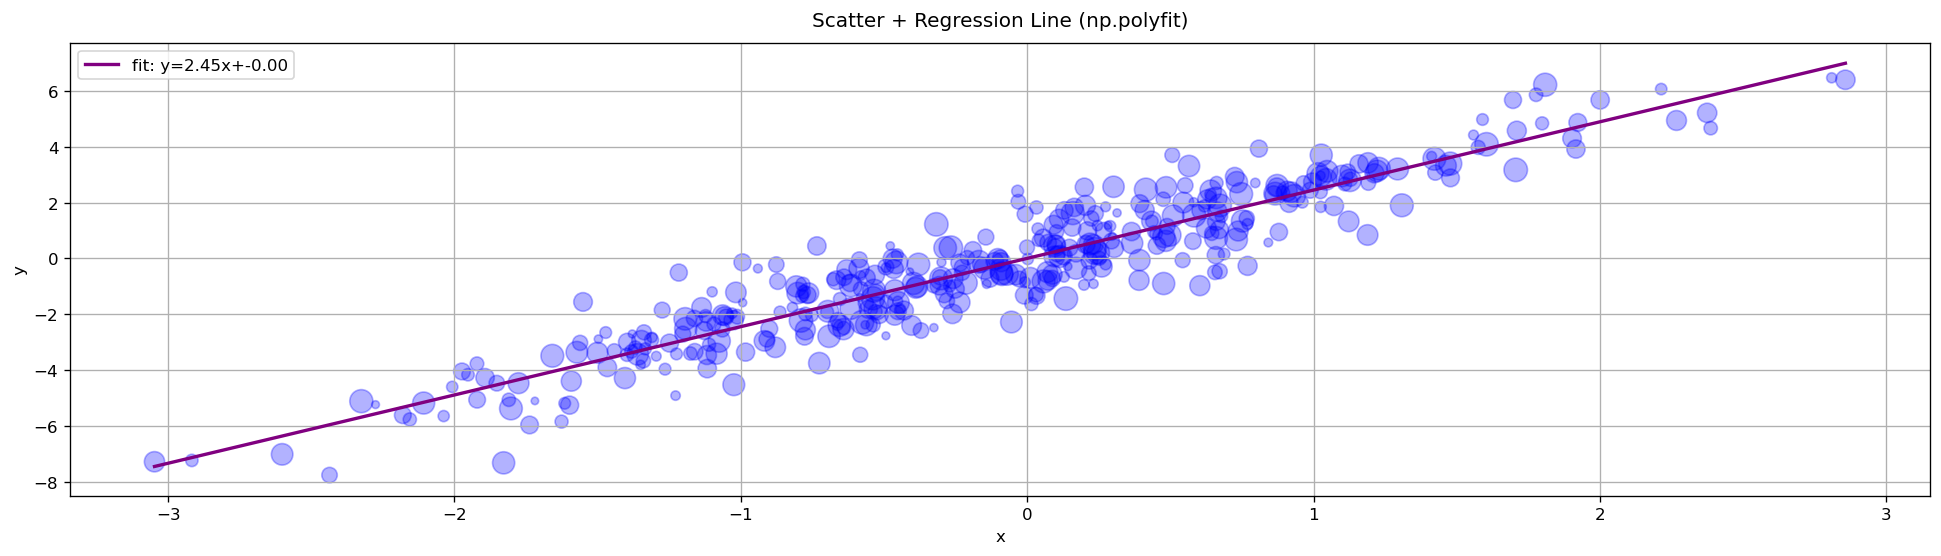

In [8]:
# Basic scatter
fig, ax = plt.subplots(1, 1, figsize=(20, 5), dpi=120)

ax.scatter(
    sc["x"], 
    sc["y"], 
    s=sc["size"],
    alpha=0.3, 
    color='blue'
)

# Fit a simple line y = a*x + b using numpy
a, b = np.polyfit(sc["x"], sc["y"], deg=1)
x_line = np.linspace(sc["x"].min(), sc["x"].max(), 200)
y_line = a * x_line + b
ax.plot(
    x_line, 
    y_line, 
    linewidth=2,
    color='purple',
    label=f"fit: y={a:.2f}x+{b:.2f}"
)

ax.set_title("Scatter + Regression Line (np.polyfit)")
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.legend()
plt.show()


## 4. Bar Charts

In [9]:
cats.head()

,category,value,segment
0,B,36.591391,new
1,B,44.495897,new
2,A,46.481701,new
3,D,73.246774,returning
4,B,63.271920,returning


In [10]:
# Counts per category
counts = cats["category"].value_counts().sort_index()
counts.head()

A    161
B    128
C    151
D    160
Name: category, dtype: int64

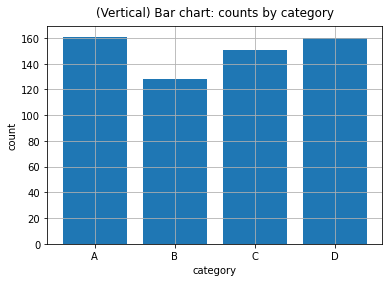

In [11]:
# Vertical Bar
fig, ax = plt.subplots()
ax.bar(counts.index, counts.values)
ax.set_title("(Vertical) Bar chart: counts by category")
ax.set_xlabel("category")
ax.set_ylabel("count")
plt.show()

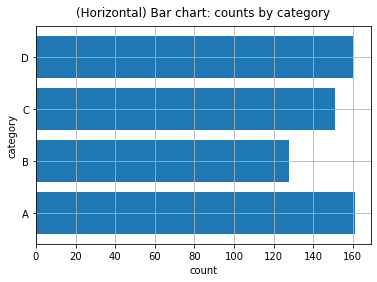

In [12]:
# Horizontal Bar
fig, ax = plt.subplots()
ax.barh(counts.index, counts.values)
ax.set_title("(Horizontal) Bar chart: counts by category")
ax.set_xlabel("count")
ax.set_ylabel("category")
plt.show()

### Grouped Bars 
- Two segments by category

In [13]:
pivot = (
    cats.groupby(["category", "segment"])
        .size()                    # count rows in each (category, segment)
        .unstack(fill_value=0)     # segment values become columns; missing -> 0
        .sort_index()              # optional: keep categories in sorted order
)

pivot.head()

segment,new,returning
category,,
A,84,77
B,83,45
C,100,51
D,98,62


In [14]:
df_plot = (cats.groupby(["category", "segment"])
              .size()
              .reset_index(name="count"))

df_plot.head()

,category,segment,count
0,A,new,84
1,A,returning,77
2,B,new,83
3,B,returning,45
4,C,new,100


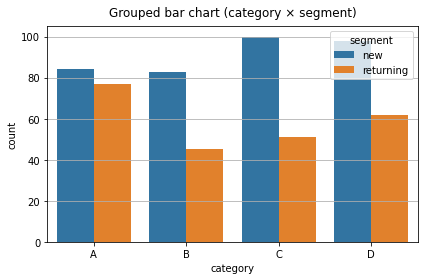

In [15]:
### seaborn with hue
fig, ax = plt.subplots()
ax = sns.barplot(data=df_plot, x="category", y="count", hue="segment")
ax.set_title("Grouped bar chart (category × segment)")
plt.tight_layout()
plt.show()

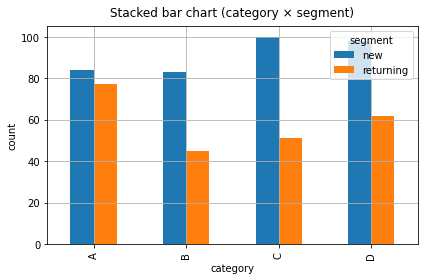

In [16]:
### pivot.plot(kind="bar")
### x-axis: index = category (A, B, C, D)
### y-axis: column = segment (new, returning)
### bar heights: the cell values

### for each category, plot bars for each segment
### stacked = False (default) -> side-by-side
ax = pivot.plot(kind="bar")

ax.set_title("Stacked bar chart (category × segment)")
ax.set_xlabel("category")
ax.set_ylabel("count")

ax.legend(title="segment")

plt.tight_layout()
plt.show()

### Stacked Bars

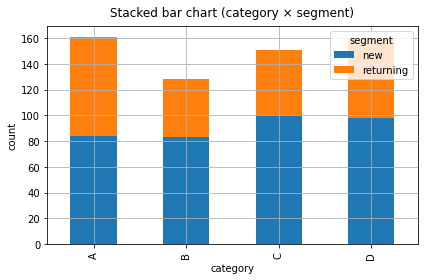

In [17]:
### x-axis: index = category
### y-axis: column = segment
### bar heights: the cell values

### for each category, plot bars for each segment
### stacked = True -> stacked
ax = pivot.plot(kind="bar", stacked=True)

ax.set_title("Stacked bar chart (category × segment)")
ax.set_xlabel("category")
ax.set_ylabel("count")

ax.legend(title="segment")

plt.tight_layout()
plt.show()


## 5. Distributions: Histogram + Boxplot + Violinplot

In [18]:
cats.head()

,category,value,segment
0,B,36.591391,new
1,B,44.495897,new
2,A,46.481701,new
3,D,73.246774,returning
4,B,63.271920,returning


### Histogram

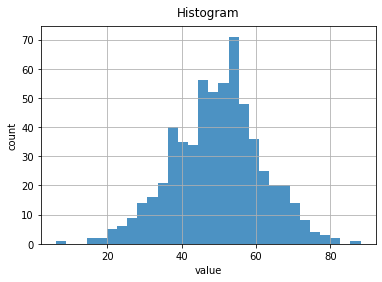

In [19]:
# Histogram (Counts)
fig, ax = plt.subplots()
ax.hist(cats["value"], bins=30, density=False, alpha=0.8)
ax.set_title("Histogram")
ax.set_xlabel("value")
ax.set_ylabel("count")
plt.show()

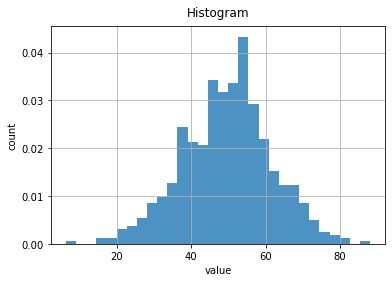

In [20]:
# Histogram (Density)
fig, ax = plt.subplots()
ax.hist(cats["value"], bins=30, density=True, alpha=0.8)
ax.set_title("Histogram")
ax.set_xlabel("value")
ax.set_ylabel("count")
plt.show()

### Boxplot
- middle line: median (50th percentile)
- box: interquartile IQR from 25th to 75th percentile (Q1->Q3)
- whiskers: extend to the most extreme points within 1.5 * IQR (by default)
- outliers: points beyond the whiskers

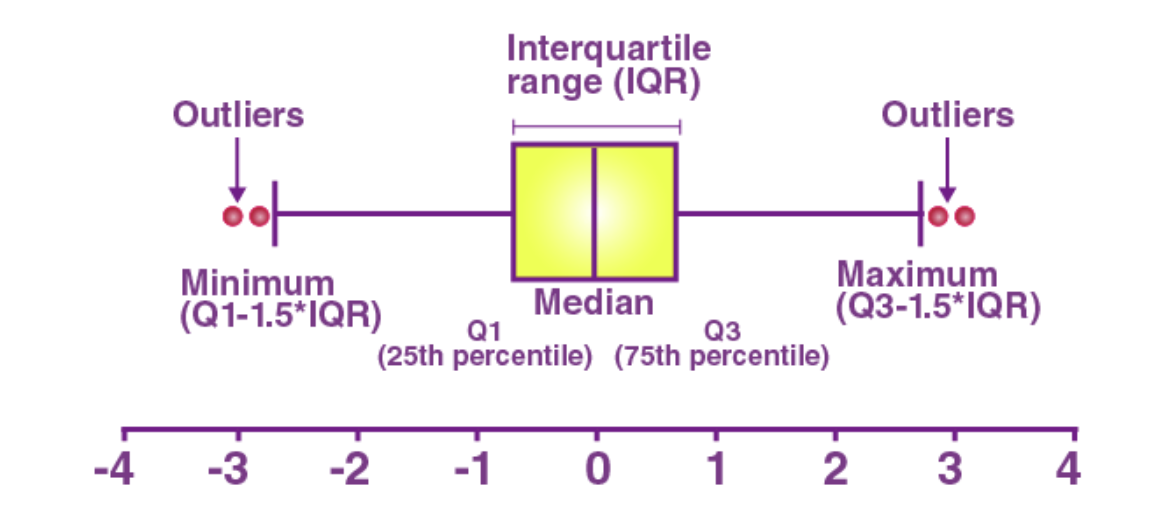

In [21]:
cats.head()

,category,value,segment
0,B,36.591391,new
1,B,44.495897,new
2,A,46.481701,new
3,D,73.246774,returning
4,B,63.271920,returning


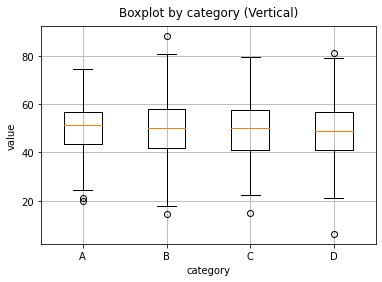

In [22]:
# Boxplot by category (Vertical)
data_by_cat = [cats.loc[cats["category"].eq(c), "value"].values for c in sorted(cats["category"].unique())]
fig, ax = plt.subplots()

# labels=... -> would become the tick labels on the category axis
ax.boxplot(
    data_by_cat, 
    labels=sorted(cats["category"].unique())
)
ax.set_title("Boxplot by category (Vertical)")
ax.set_xlabel("category")
ax.set_ylabel("value")
plt.show()

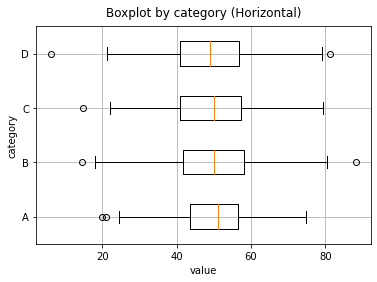

In [23]:
# Boxplot by category (Horizontal)
data_by_cat = [cats.loc[cats["category"].eq(c), "value"].values for c in sorted(cats["category"].unique())]
fig, ax = plt.subplots()

# labels=... -> would become the tick labels on the category axis
ax.boxplot(
    data_by_cat, 
    labels=sorted(cats["category"].unique()),
    vert=False
)
ax.set_title("Boxplot by category (Horizontal)")
ax.set_xlabel("value")
ax.set_ylabel("category")
plt.show()

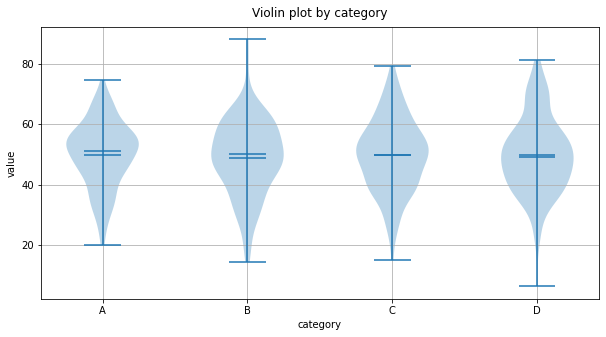

In [24]:
# Violin plot by category
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.violinplot(
    data_by_cat, 
    showmeans=True, 
    showmedians=True,
    vert=True,
)
ax.set_title("Violin plot by category")
ax.set_xlabel("category")
ax.set_ylabel("value")

# Matplotlib's violinplot doesn't automatically label categories:
ax.set_xticks(np.arange(1, len(data_by_cat) + 1))
ax.set_xticklabels(sorted(cats["category"].unique()))

plt.show()


## 6. Heatmaps

In [25]:
# A tiny "churn prediction" style dataset

# - tenure_months: how long the customer has been with the company
# - monthly_charges: how much they pay per month
# - support_calls_30d: how many times they called support in last 30 days
# - is_contract: 1 if on a contract (usually reduces churn), else 0
# - churn: the label (1 = churned, 0 = not churned)

# We intentionally create a pattern: 
# short tenure + high charges + many support calls => more churn (1)

df = pd.DataFrame({
    "tenure_months":     [1, 2, 3,  5,  8, 12, 15, 18, 24, 30],
    "monthly_charges":   [90,85,80, 75, 70, 65, 60, 55, 50, 45],
    "support_calls_30d": [5, 4, 4,  3,  2,  2,  1,  1,  0,  0],
    "is_contract":       [0, 0, 0,  0,  1,  1,  1,  1,  1,  1],
    "churn":             [1, 1, 1,  1,  0,  0,  0,  0,  0,  0],
})

df

,tenure_months,monthly_charges,support_calls_30d,is_contract,churn
0,1,90,5,0,1
1,2,85,4,0,1
2,3,80,4,0,1
3,5,75,3,0,1
4,8,70,2,1,0
5,12,65,2,1,0
6,15,60,1,1,0
7,18,55,1,1,0
8,24,50,0,1,0
9,30,45,0,1,0


In [26]:
print(df.dtypes.value_counts())
corr = df.select_dtypes(include=["int64"]).corr()
corr

int64    5
dtype: int64


,tenure_months,monthly_charges,support_calls_30d,is_contract,churn
tenure_months,1.000000,-0.972594,-0.940886,0.787880,-0.787880
monthly_charges,-0.972594,1.000000,0.984955,-0.852803,0.852803
support_calls_30d,-0.940886,0.984955,1.000000,-0.884652,0.884652
is_contract,0.787880,-0.852803,-0.884652,1.000000,-1.000000
churn,-0.787880,0.852803,0.884652,-1.000000,1.000000


/var/folders/ph/0rdmgdvx03z3s71c_pjyjg_r0000gn/T/ipykernel_51850/1220075579.py:18: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(im, ax=ax, shrink=0.9)


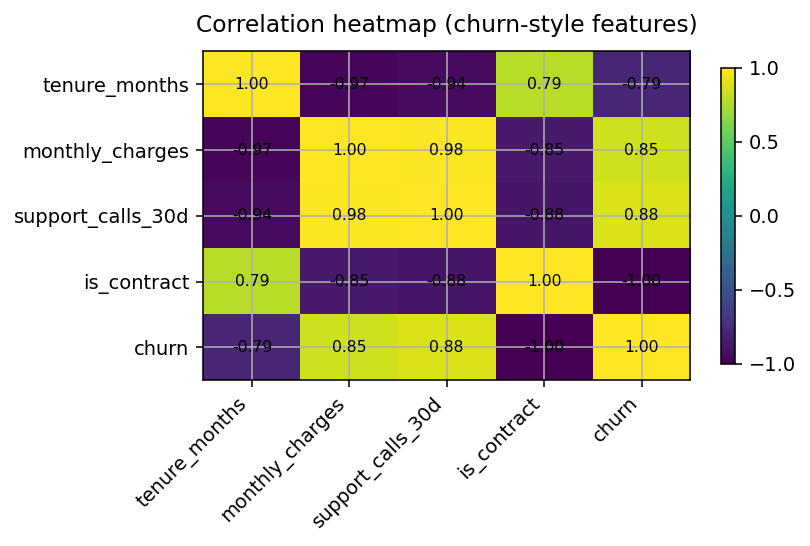

In [27]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=140)

### ax.imshow(): takes a 2D array and renders it as a colored image
im = ax.imshow(corr.values, aspect="auto")

### set tick positions to match the matrix indices
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.index)))
ax.set_xticklabels(corr.columns, rotation=45, ha="right")
ax.set_yticklabels(corr.index)

### add numeric correlation values inside each cell
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        ax.text(j, i, f"{corr.iat[i, j]:.2f}", ha="center", va="center", fontsize=8)

### add a colorbar to interpret the colors
fig.colorbar(im, ax=ax, shrink=0.9)
ax.set_title("Correlation heatmap (churn-style features)")

plt.tight_layout()
plt.show()


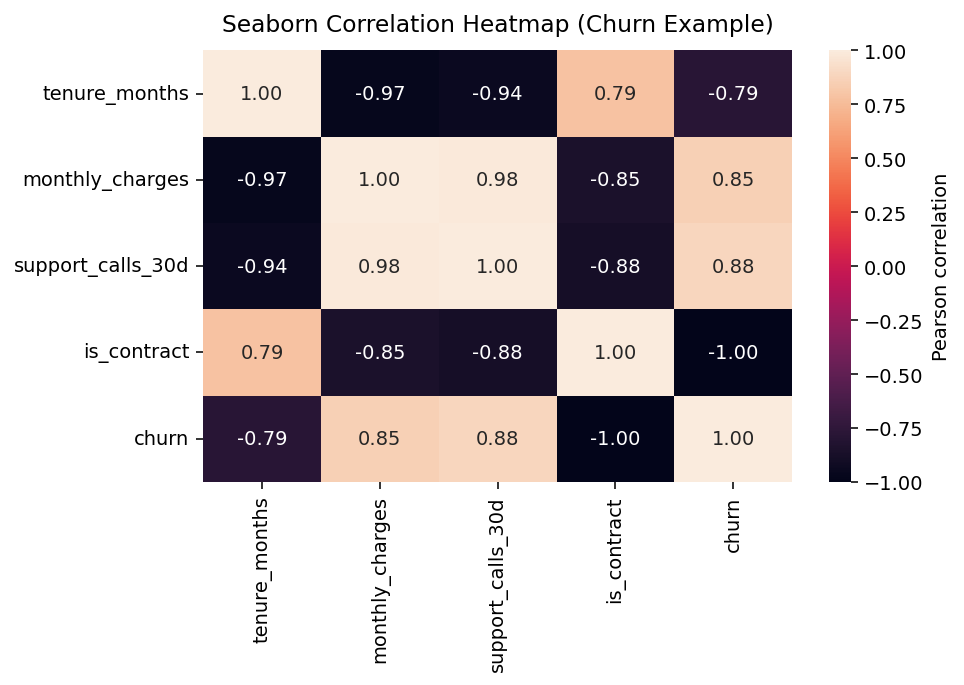

In [28]:
plt.figure(figsize=(7, 5), dpi=140)
sns.heatmap(
    corr,
    annot=True,       # show numbers in each cell
    fmt=".2f",        # number format
    cbar_kws={"label": "Pearson correlation"}  # label the colorbar
)

plt.title("Seaborn Correlation Heatmap (Churn Example)")
plt.tight_layout()
plt.show()

## 7. Comparison of Seaborn and Matplotlib

- Seaborn is a “plotting wrapper” on top of Matplotlib that bakes in a lot of the annoying setup you’d otherwise do by hand.

| Aspect | Seaborn (higher-level) | Matplotlib (lower-level) | What this means in practice |
|---|---|---|---|
| Main goal | Statistical + EDA plotting with good defaults | General-purpose plotting “primitives” | Seaborn is optimized for common analysis charts; Matplotlib is the foundation layer |
| Typical input | `DataFrame` + column names (`data=df, x=..., y=...`) | Arrays/lists (`x`, `y`) | Seaborn feels “native” with pandas; Matplotlib often needs you to extract/reshape first |
| Categorical x-axis | Automatically handles categories + ordering | You map categories to numbers and set tick labels | Seaborn avoids `np.arange(...)`, `set_xticks`, `set_xticklabels` boilerplate |
| Grouped bars (`hue`) | One parameter: `hue="segment"` | Manually compute bar offsets (`x±width/2`) + legend | Seaborn saves the “bar positioning math” |
| Aggregation (barplot) | Can compute summary statistics for you (mean, CI, etc.) | You must pre-aggregate with pandas | Seaborn is “plot + stats”; Matplotlib is “plot only” |
| Heatmaps | `sns.heatmap(df, annot=True)` does labels + annotations | `imshow()` + manual ticks + manual annotation loop | Seaborn bundles the common heatmap setup into one call |
| Labels from DataFrame | Uses index/columns automatically | You must supply tick labels yourself | Less mismatch/bug risk with labels in Seaborn |
| Default aesthetics | Cleaner defaults (themes, spacing, legends) | Minimal defaults by design | Seaborn looks “nice” with less styling code |
| Customization level | Medium-high (good knobs for common plots) | Very high (full control of everything) | Matplotlib wins when you need precise control and unusual layouts |
| Learning curve | Easier for standard EDA charts | Steeper for complex charts (more manual steps) | Seaborn is quicker to get productive; Matplotlib rewards deep control |
| Speed to first plot | Fast | Slower (more setup) | Seaborn is great for exploration and quick iteration |
| Best use cases | EDA, quick dashboards, statistical comparisons | Publication-grade fine control, custom visuals, complex layouts | Use Seaborn for 80% EDA; drop to Matplotlib when you hit limits |
| How they work together | Built on top of Matplotlib | Base layer | You can do `ax = sns...` then refine with `ax.set_title(...)`, etc. |


## 8. Common EDA tasks

### Task A: plot daily series + rolling average + highlight last value

In [35]:
ts.head()

,date,y,y_roll7
0,2025-01-01,100.304717,NaN
1,2025-01-02,99.264733,NaN
2,2025-01-03,100.015184,NaN
3,2025-01-04,100.955749,NaN
4,2025-01-05,99.004714,NaN


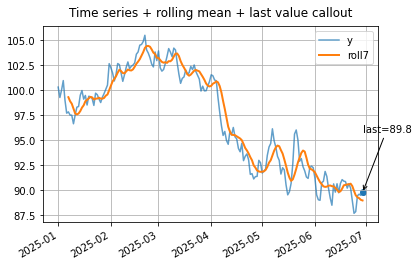

In [29]:
fig, ax = plt.subplots()
ax.plot(ts["date"], ts["y"], label="y", alpha=0.7)
ax.plot(ts["date"], ts["y_roll7"], label="roll7", linewidth=2)

last_x = ts["date"].iloc[-1]
last_y = ts["y"].iloc[-1]
ax.scatter([last_x], [last_y])
ax.annotate(f"last={last_y:.1f}", xy=(last_x, last_y), xytext=(last_x, last_y + 6),
            arrowprops=dict(arrowstyle="->"))

ax.set_title("Time series + rolling mean + last value callout")
ax.legend()
fig.autofmt_xdate()
plt.show()


### Task B: distribution by segment (two histograms)

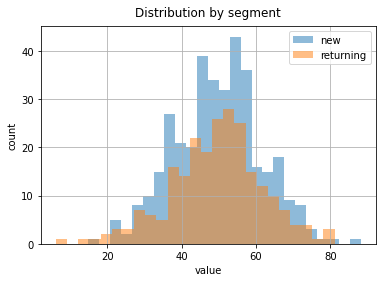

In [30]:
fig, ax = plt.subplots()

for seg in sorted(cats["segment"].unique()):
    vals = cats.loc[cats["segment"].eq(seg), "value"]
    ax.hist(vals, bins=25, alpha=0.5, label=seg)

ax.set_title("Distribution by segment")
ax.set_xlabel("value")
ax.set_ylabel("count")
ax.legend()
plt.show()


### Task C: top categories by mean value (bar)

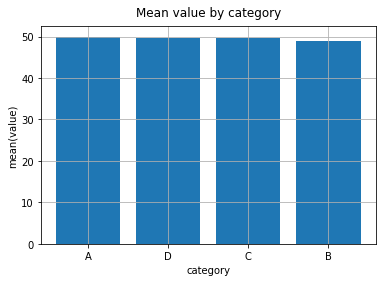

In [31]:
means = (cats.groupby("category")["value"]
         .mean()
         .sort_values(ascending=False))

fig, ax = plt.subplots()
ax.bar(means.index, means.values)
ax.set_title("Mean value by category")
ax.set_xlabel("category")
ax.set_ylabel("mean(value)")
plt.show()


### Task D: scatter + marginal histograms (manual layout)

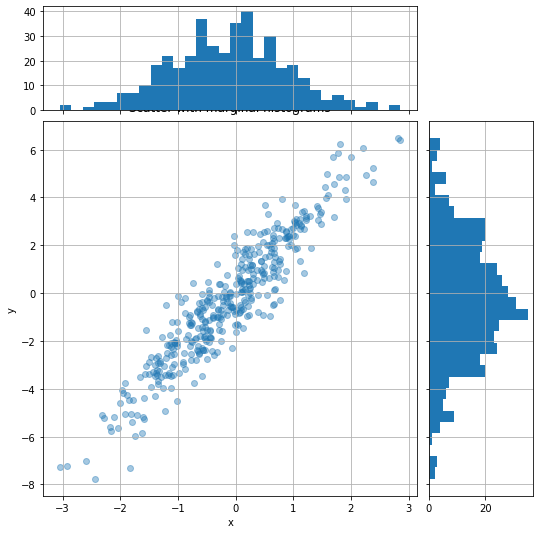

In [ ]:
fig = plt.figure(figsize=(8, 8))

# Main scatter
ax_scatter = fig.add_axes([0.1, 0.1, 0.65, 0.65])
# Top histogram
ax_histx = fig.add_axes([0.1, 0.77, 0.65, 0.18], sharex=ax_scatter)
# Right histogram
ax_histy = fig.add_axes([0.77, 0.1, 0.18, 0.65], sharey=ax_scatter)

ax_scatter.scatter(sc["x"], sc["y"], alpha=0.4)
ax_scatter.set_xlabel("x")
ax_scatter.set_ylabel("y")
ax_scatter.set_title("Scatter with marginal histograms")

ax_histx.hist(sc["x"], bins=30)
ax_histy.hist(sc["y"], bins=30, orientation="horizontal")

# Hide tick labels on shared axes to reduce clutter
plt.setp(ax_histx.get_xticklabels(), visible=False)
plt.setp(ax_histy.get_yticklabels(), visible=False)

plt.tight_layout
plt.show()
